# Correction des exercices 

Correction de l'exercice 1

In [1]:
# La fonction queFaitElle trace la courbe representative de la fonction
# sinus sur l'intervalle [-4 ; 4]

Correction de l'exercice 2

In [ ]:
import math
import matplotlib.pyplot as plt

def repereCentre ():
    # on recupere les coordonnees de la fenetre dans la liste f
    f = plt.axis()
    # on recupere les axes pour les deplacer...
    ax=plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))


def traceCourbeCosinus(n, a, b):
    # cette fonction prend comme arguments un entier n, deux entiers a et b
    # avec a < b, et trace la courbe de la fonction cosinus sur l’intervalle
    # [a ; b] a l’aide de n points
    #
    # necessite les modules math et matplotlib.pyplot

    LX = [a + x * (b - a) / (n - 1) for x in range(n)]
    LY = [math.cos(x) for x in LX]
    plt.axis('equal')
    plt.plot(LX, LY, "r-", linewidth = 2)
    repereCentre()
    plt.show()

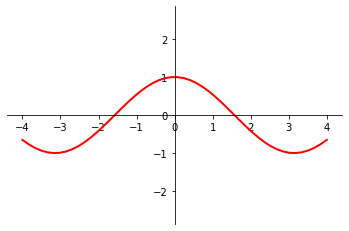

In [4]:
traceCourbeCosinus(50, -4, 4)

Correction de l'exercice 3

In [8]:
def f(x):
    # une simple fonction exemple, pour pouvoir tester
    return (x + 5) / (2 * x + 4)


def traceCourbeFonction(f, n, a, b):
    # cette fonction prend comme arguments une fonction f, un entier n, deux
    # entiers a et b avec a < b, et trace la courbe de la fonction f sur
    # l’intervalle [a ; b] a l’aide de n points
    #
    # necessite le module matplotlib.pyplot

    LX = [a + x * (b - a) / (n - 1) for x in range(n)]
    LY = [f(x) for x in LX]
    plt.axis('equal')
    plt.plot(LX, LY, "r-", linewidth = 2)
    repereCentre()
    plt.show()


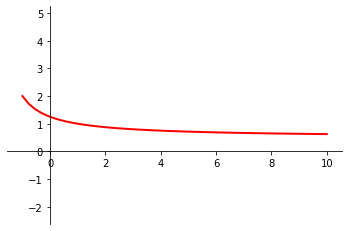

In [9]:
traceCourbeFonction(f, 50, -1, 10)

Correction de l'exercice 4

In [17]:
## Construction graphique des termes d’une suite recurrente

## deux fonctions pour tester...
def f(x):
    return 3.2 * x * (1 - x)

def g(x):
    return 1 + x * x / (1 + x)


def IterationSuiteRecurrente(f, u0, nb):
    # cette fonction prend comme arguments une fonction f definissant les termes
    # d'une suite recurrente, un nombre flottant  u0 qui est le premier terme de
    # la suite, le nombre d'iterations nb, et illustre la construction graphique
    # des termes de cette suite.
    #
    # necessite les modules math et matplotlib.pyplot


    # trace des iterations : coordonnees des points dans les listes Lx et Ly
    Lx = [u0]
    Ly = [0]
    elem = u0
    # on construit les points un à un
    for i in range(nb):
        Lx.extend([elem, f(elem)])
        Ly.extend([f(elem), f(elem)])
        elem = f(elem)
    plt.plot(Lx, Ly, "g-", linewidth = 2)

    # recupere les limites du rectangle graphique, pour avoir les
    # abscisses minimale et maximale
    D = plt.axis()
    mini = math.floor(D[0])
    maxi = math.ceil(D[1])

    # tracé de la courbe de f sur l'intervalle [mini ; maxi]
        # nombre de points en abscisses (100 par unité)
    n = math.floor(100 * (maxi - mini))
        # espace entre les points sur [mini; maxi]
    h = (maxi - mini) / (n - 1)
        # les points de la courbe
    Lx = [mini + i * h for i in range(n)]
    Ly = [f(x) for x in Lx]
    plt.plot(Lx, Ly, "r-", linewidth = 2)

    # tracé de la bissectrice sur l'intervalle [mini ; maxi]
    plt.plot([mini, maxi],[mini, maxi], "r-", linewidth = 2)

    plt.show()


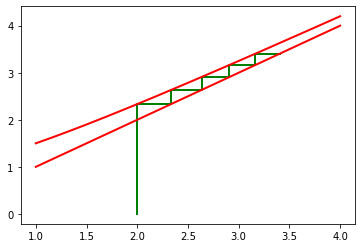

In [24]:
IterationSuiteRecurrente(g, 2, 5)

Correction de l'exercice 5

In [25]:
def methodeRectangles(n):
    # cette fonction prend comme argument le nombre de rectangles souhaite,
    # trace la courbe de la fonction x --> ln(x) sur l'intervalle [1.6;3.4]
    # et le graphique illustrant la methode sur l'intervalle [2;3], puis
    # renvoie les valeurs de l'encadrement obtenu.
    #
    # necessite les modules math et matplotlib.pyplot


    # limite des axes, repere orthonorme
    plt.axis("equal")
    plt.axis([1.8, 3.2, 0, 1.3])
    # courbe de la fonction x --> ln(x) sur l'intervalle [1.6;3.4]
    # avec 400 points intermediaires
    ecart = (3.4 - 1.6) / 399
    listeX = [1.6 + x * ecart for x in range(0, 400)]
    listeY = [math.log(x) for x in listeX]
    plt.plot(listeX, listeY, "k.-", ms = 2)

    # initialisation de l'encadrement
    inf = 0
    sup = 0
    # initialisation du dessin des rectangles (bord gauche rectangle inferieur)
    # inferieur en rouge, superieur en bleu
    plt.plot([2, 2], [0, math.log(2 + 1 / n)], "r.-", ms = 1)

    # parcours et construction des n rectangles
    for k in range(0, n):
        x0 = 2 + k / n
        x1 = x0 + 1 / n
        logx0 = math.log(x0)
        logx1 = math.log(x1)
        # mise a jour de l'encadrement
        inf = inf + logx0 * 1 / n
        sup = sup + logx1 * 1 / n
        # trace des portions de rectangles, inferieur et superieur
        plt.plot([x0, x1], [logx0, logx0], "r.-", ms = 1)
        plt.plot([x1, x1], [0, logx1], "r.-", ms = 1)
        plt.plot([x0, x0, x1], [logx0, logx1, logx1], "b.-", ms = 1)

    # on affiche l'encadrement dans le titre du graphique
    plt.title(str(n) + " rectangles, " + str(inf) + " <= aire <= " + str(sup))

    plt.show()
    return inf, sup


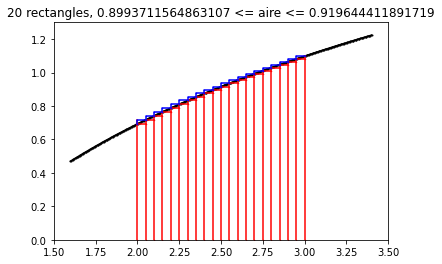

(0.8993711564863107, 0.919644411891719)

In [26]:
methodeRectangles(20)

Correction de l'exercice 6

In [27]:
import random

def montecarlo(n):
    # cette fonction prend comme argument le nombre de points que l’on
    # souhaite simuler, affiche une visualisation graphique de la simulation,
    # puis renvoie l’approximation de l’aire sous la courbe de la fonction
    # x --> exp(-x ** 2) sur l'intervalle [0;2]
    #
    # necessite les modules math, random et matplotlib.pyplot


    plt.axis("equal")
    # trace de la courbe (200 points)
    listeX = [x / 100 for x in range(201)]
    listeY = [math.exp(-x ** 2) for x in listeX]
    plt.plot(listeX, listeY, "k.", ms=5)
    # simulation
    nbPointsDessous = 0
    for i in range(n + 1):
        x = random.uniform(0,2)
        y = random.random()
        if y < math.exp( -x ** 2):
            nbPointsDessous = nbPointsDessous + 1
            plt.plot(x, y, "r.")
        else:
            plt.plot(x, y, "k.")
    approx = 2 * nbPointsDessous / n

    # titre du graphique...
    plt.title("Approximation de l'aire avec " + str(n) + " points : "
              + str(approx))
    plt.show()
    return approx

def :
    # Deuxieme version (exécution beaucoup plus rapide !)
    # on construit les listes de points avant de les afficher...
    #montecarloBIS(n)
    # necessite les modules math, random et matplotlib.pyplot


    plt.axis("equal")
    # trace de la courbe (200 points)
    listeX = [x / 100 for x in range(201)]
    listeY = [math.exp(-x ** 2) for x in listeX]
    plt.plot(listeX, listeY, "k.", ms=5)
    # simulation
    listeDessousX = []
    listeDessousY = []
    listeDessusX = []
    listeDessusY = []
    nbPointsDessous = 0
    for i in range(n + 1):
        x = random.uniform(0,2)
        y = random.random()
        if y < math.exp( -x ** 2):
            nbPointsDessous = nbPointsDessous + 1
            listeDessousX.append(x)
            listeDessousY.append(y)
        else:
            listeDessusX.append(x)
            listeDessusY.append(y)
    approx = 2 * nbPointsDessous / n

    # titre du graphique...
    plt.title("Approximation de l'aire avec " + str(n) + " points : "
              + str(approx))
    # affichage des points
    plt.plot(listeDessousX,listeDessousY,"r.")
    plt.plot(listeDessusX,listeDessusY,"k.")
    plt.show()
    return approx



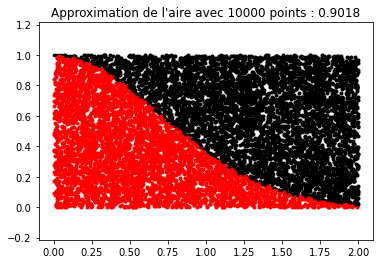

0.9018

In [30]:
montecarlo(10000)

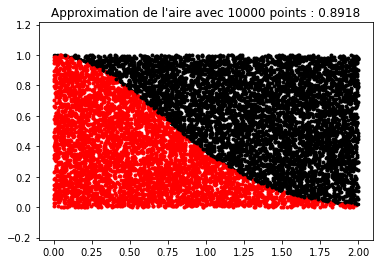

0.8918

In [31]:
montecarloBIS(10000)

Correction de l'exercice 7

In [32]:
def rendezVous(n):
    # cette fonction prend comme arguments un entier n, simule aleatoirement
    # n couples d’horaires d’arrivee et renvoie la frequence des rendez-vous
    # reussis (dont l'ecart n'est pas superieur a 15 min)
    #
    # Illustration = affichage des "points rendez-vous" de coordonnees
    # (minutes Alice ; minutes Charpentier), en rouge ou noir
    #
    # necessite les modules matplotlib.pyplot et random

    nbSucces = 0
    LsuccesX = []
    LsuccesY = []
    LechecX = []
    LechecY = []
    for i in range(n):
        # on tire aleatoirement les minutes d'arrivee d'Alice et du
        # Charpentier...
        minutesA = random.randint(0,60)
        minutesC = random.randint(0,60)
        if -15 <= minutesA - minutesC <= 15:
            nbSucces = nbSucces + 1
            LsuccesX.append(minutesA)
            LsuccesY.append(minutesC)
        else:
            LechecX.append(minutesA)
            LechecY.append(minutesC)

    plt.plot(LsuccesX, LsuccesY, 'xr')
    plt.plot(LechecX, LechecY, 'xk')
    plt.title("Nombre de succes obtenus avec " + str(n) + " tirages : "
              + str(nbSucces))
    plt.show()
    return(nbSucces / n)



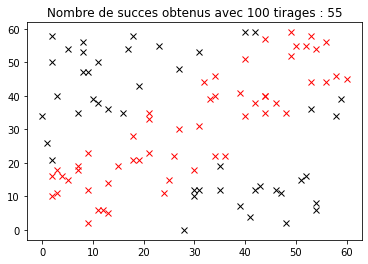

0.55

In [33]:
rendezVous(100)

Correction de l'exercice 8

In [34]:
## Aiguille de Buffon

def aiguilleDeBuffon(N):
    # cette fonction prend comme argument un entier N, simule le lancer de
    # N aiguilles de longueur 1 sur un plancher dont les lames paralleles
    # sont de largeur 1, affiche le resultat (dessin) obtenu, et renvoie
    # la frequence de l'evenement "l’aiguille est a cheval sur deux lames"
    #
    # Remarque : 2 / frequence tend vers Pi...
    #
    # necessite les modules math, random et matplotlib.pyplot

    plt.axis("equal")
    plt.axis("off")

    # dessine une lame de plancher 1 x 3
    plt.plot([0, 0], [0, 3], "-k")
    plt.plot([1, 1], [0, 3], "-k")

    nbACheval = 0
    # lancer des N aiguilles
    for i in range(N):
        # tirage extremite de l'aiguille
        x1 = random.uniform(0,1)
        y1 = random.uniform(0,3)
        # tirage de l'angle
        alpha = random.uniform(0, 2 * math.pi)
        # coordonnees de l'autre extremite
        x2 = x1 + math.cos(alpha)
        y2 = y1 + math.sin(alpha)
        # dessin de l'aiguille : bleu si dedans, rouge si a cheval
        if (x1 == 0) or (x1 == 1) or (x2 <= 0) or (x2 >= 1):
            plt.plot([x1, x2], [y1, y2], "-r")
            nbACheval = nbACheval + 1
        else:
            plt.plot([x1, x2], [y1, y2], "-b")

    frequence = nbACheval / N
    # le titre du graphique...
    plt.title("Frequence : f = " + str(frequence) + ",  2 / f = " + str(2 / frequence))
    plt.show()

    return frequence


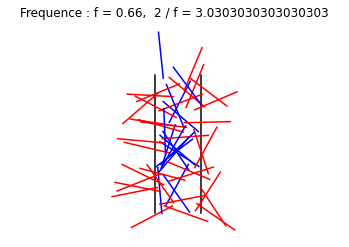

0.66

In [36]:
aiguilleDeBuffon(50)

Correction de l'exercice 10

In [37]:
def mentionsBAC():
    # cette fonction (sans arguments) illustre graphiquement le fait que
    # dans 95 % des echantillons, le pourcentage des eleves français ayant
    # leur bac avec une mention reste compris entre deux valeurs assez
    # proches de 47,5 %
    #
    # necessite les modules random et matplotlib.pyplot

    # ligne horizontale a 47,5 %
    plt.plot([0, 100], [0.475, 0.475], "k--")

    for i in range(100):
        n = 0
        for j in range(400):
            if random.random() < 0.475:
                n = n + 1
            frequence = n / 400
        if (frequence > 0.425) and (frequence < 0.525):
            plt.plot(i, frequence, "rx")
        else:
            plt.plot(i, frequence, "bx")

    plt.axis(xmin = 0, xmax = 100, ymin = 0.3, ymax = 0.7)
    plt.show()





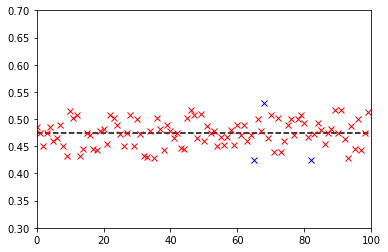

In [38]:
mentionsBAC()